# Project Pengantar Text Mining "Sequential Labelling For Sentiment Extraction in Tokopedia's Customer Review with IndoBERT"

Kelompok 3

Nama Anggota :
1. Dionisius Indra Raditya (M0721019)
2. Erin Jihan Wahyu Kusuma (M0721024)
3. Muhammad Rifai (M0721047)
4. Pramesthi Kartika Siwi Hapsari (M0721058)
5. Siti A'isyah (M0721064)


# Load Dataset

In [ ]:
!pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1Lc5ouWdu1AwGiVog2gQy70Y8U57Fmq8x'
output = 'PRDECT-ID Dataset.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Lc5ouWdu1AwGiVog2gQy70Y8U57Fmq8x
To: /content/PRDECT-ID Dataset.csv
100%|██████████| 1.26M/1.26M [00:00<00:00, 17.8MB/s]


'PRDECT-ID Dataset.csv'

# Text Prepocessing

In [ ]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Unduh resource NLTK jika belum ada
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)

# Inisialisasi lemmatizer
lemmatizer = WordNetLemmatizer()

# Kamus slang dan typo untuk normalisasi
slang_to_baku = {'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'gk': 'tidak', 'tdk': 'tidak',
    'dlm': 'dalam', 'sm': 'sama', 'klo': 'kalau', 'aja': 'saja', 'dr': 'dari',
    'trs': 'terus', 'tp': 'tapi', 'udh': 'sudah', 'jg': 'juga', 'blm': 'belum',
    'sy': 'saya', 'aku': 'saya', 'km': 'kamu', 'lg': 'lagi', 'bnr': 'benar',
    'bs': 'bisa', 'hrs': 'harus', 'msh': 'masih', 'org': 'orang', 'skrg': 'sekarang',
    'ny': 'nya', 'knp': 'kenapa', 'gmna': 'bagaimana', 'pdhl': 'padahal',
    'smg': 'semoga', 'krn': 'karena', 'mlh': 'malah', 'ntr': 'nanti', 'sdh': 'sudah',
    'bgmn': 'bagaimana', 'tlg': 'tolong', 'banget': 'sangat', 'mau': 'ingin',
    'kasih': 'beri', 'seler': 'penjual', 'makasih': 'terima kasih',
    'btw': 'ngomong-ngomong', 'brg': 'barang', 'jd': 'jadi', 'bgt': 'sangat',
    'dmn': 'di mana', 'nggak': 'tidak', 'ajaib': 'menakjubkan', 'amanah': 'dapat dipercaya',
    'pokoknya': 'intinya', 'keren': 'luar biasa', 'mantap': 'hebat', 'ajib': 'menakjubkan',
    'kece': 'menarik', 'cuan': 'keuntungan', 'ribet': 'rumit', 'copot': 'terlepas',
    'lapor': 'melapor', 'cepet': 'cepat', 'capek': 'lelah', 'sblm': 'sebelum',
    'trm': 'terima', 'gampang': 'mudah', 'lumayan': 'cukup', 'ane': 'saya',
    'agan': 'bapak/ibu', 'gt': 'gitu', 'dng': 'dengan', 'trimakasih': 'terima kasih',
    'gmn': 'bagaimana', 'udah': 'sudah', 'jir': 'anjir', 'janggan': 'jangan',
    'ama': 'sama', 'bosok': 'busuk', 'hadeuhh': 'aduh'
}

# Fungsi untuk mengganti slang atau typo
def ubah_slang(text):
    words = text.split()
    processed_words = [slang_to_baku.get(word, word) for word in words]
    return ' '.join(processed_words)

# Fungsi untuk tokenisasi
def tokenize_text(text):
    return re.findall(r'\b\w+\b', text)

# Fungsi preprocessing lengkap
def preprocess_review(text):
    # 1. Lowercasing
    text = text.lower()
    # 2. Normalisasi slang/typo ke kata baku
    text = ubah_slang(text)
    # 3. Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4. Tokenisasi
    tokens = tokenize_text(text)
    # 5. Lemmatization (mengganti stemming dengan lemmatization)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Gabungkan kembali menjadi teks
    return ' '.join(lemmatized_tokens)

# Load data dari file CSV
file_path = 'PRDECT-ID Dataset.csv'
df = pd.read_csv(file_path)

# Terapkan preprocessing ke kolom 'Customer Review'
df['Processed Review'] = df['Customer Review'].apply(preprocess_review)

# Tampilkan hasil
print(df[['Customer Review', 'Processed Review']].head())

# Simpan hasil ke file baru (opsional)
output_path = 'Processed_PRDECT_ID_Dataset.csv'
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                     Customer Review  \
0  Alhamdulillah berfungsi dengan baik. Packaging...   
1  barang bagus dan respon cepat, harga bersaing ...   
2  barang bagus, berfungsi dengan baik, seler ram...   
3  bagus sesuai harapan penjual nya juga ramah. t...   
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...   

                                    Processed Review  
0  alhamdulillah berfungsi dengan baik packaging ...  
1  barang bagus dan respon cepat harga bersaing d...  
2  barang bagus berfungsi dengan baik penjual ram...  
3  bagus sesuai harapan penjual nya juga ramah te...  
4  barang bagus pengemasan aman dapat berfungsi d...  
Processed data saved to Processed_PRDECT_ID_Dataset.csv


# EDA (Exploratory Data Analysis)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


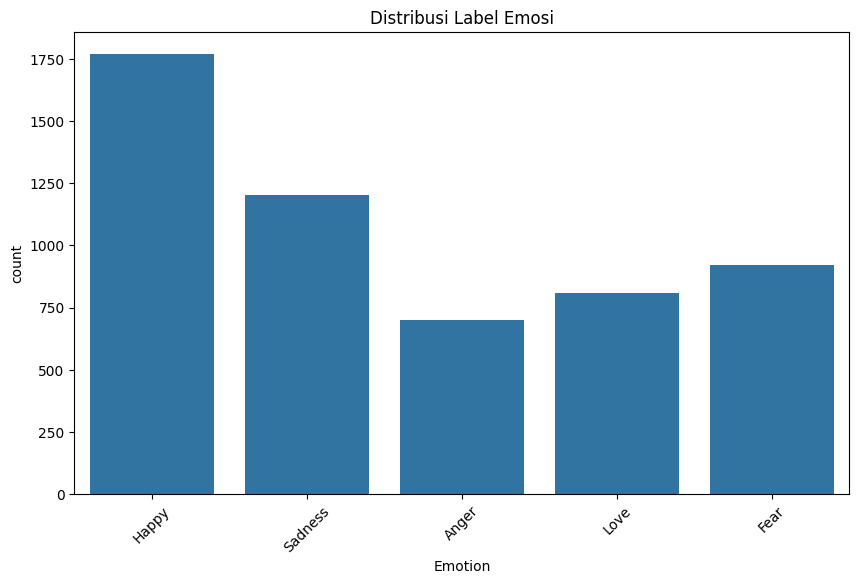

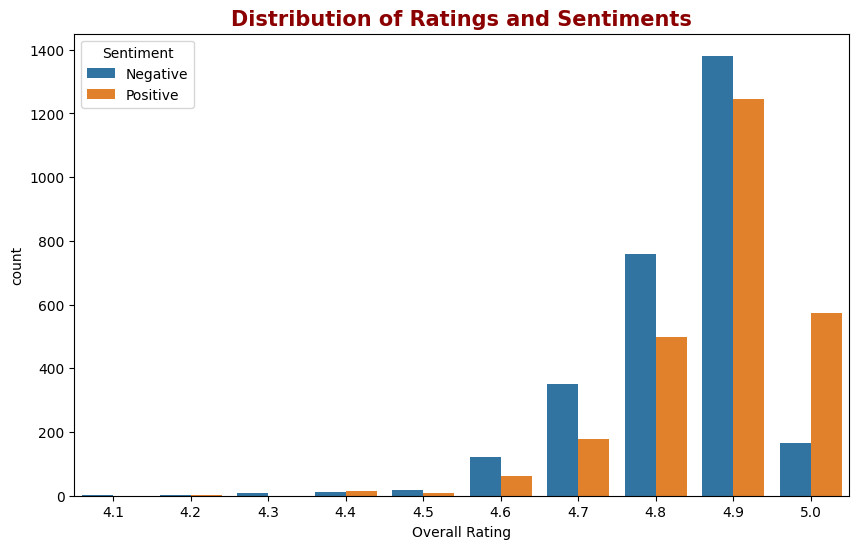

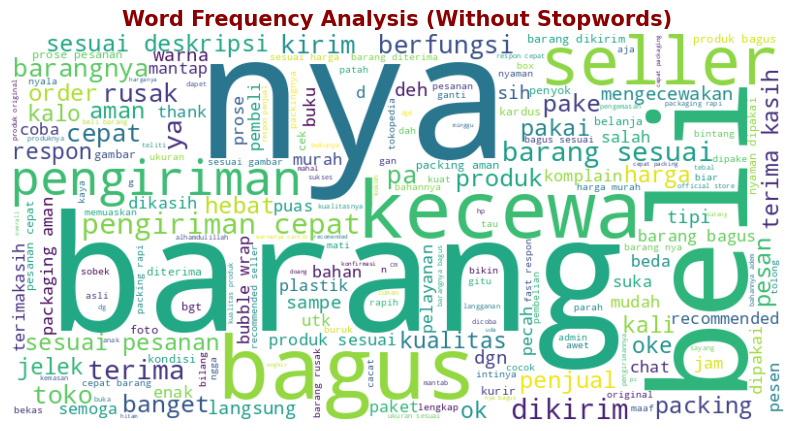

In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk

# Download resource NLTK jika diperlukan
nltk.download('stopwords', force=True)

# Inisialisasi stopwords
stop_words = set(stopwords.words('indonesian'))

# Baca dataset
file_path = 'Processed_PRDECT_ID_Dataset.csv'
df = pd.read_csv(file_path)

# Plot distribusi label emosi
if 'Emotion' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Emotion')
    plt.title('Distribusi Label Emosi')
    plt.xticks(rotation=45)
    plt.show()

# Distribution of Ratings and Sentiments
if 'Overall Rating' in df.columns and 'Sentiment' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Overall Rating', hue='Sentiment', data=df)
    plt.title('Distribution of Ratings and Sentiments', fontsize=15, fontweight='bold', color='darkred')
    plt.show()

# Analisis Frekuensi Kata dengan Stopwords
if 'Processed Review' in df.columns:
    # Gabungkan semua ulasan menjadi satu string
    reviews = ' '.join(df['Processed Review'].fillna('Unknown'))

    # Filter kata-kata yang bukan stopwords
    filtered_words = ' '.join([word for word in reviews.split() if word.lower() not in stop_words])

    # Buat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)

    # Tampilkan WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Frequency Analysis (Without Stopwords)', fontsize=15, fontweight='bold', color='darkred')
    plt.savefig('Word_Frequency_Analysis.png')
    plt.show()

# Pelabelan BIO (Begin - Inside - Out)

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForTokenClassification
from torch.cuda.amp import autocast
import re
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from tqdm import tqdm
from sklearn.metrics import classification_report

# Set random seed untuk konsistensi hasil
torch.manual_seed(42)

# Set model pre-trained
model_name = 'indobenchmark/indobert-base-p1'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForTokenClassification.from_pretrained(model_name, num_labels=9)

# ndahkan model ke GPU jika tersedia
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Ubah model ke evaluasi mode
model.eval()

# Label mapping sesuai skema BIO
id2label = {0: "O", 1: "B-Aspect", 2: "I-Aspect", 3: "B-Sentiment-positive", 4: "I-Sentiment-positive",
            5: "B-Sentiment-negative", 6: "I-Sentiment-negative", 7: "B-Sentiment-neutral", 8: "I-Sentiment-neutral"}
label2id = {label: id for id, label in id2label.items()}

# Fungsi untuk menentukan apakah suatu kata berkaitan dengan aspek atau sentimen
def get_sentiment_label(word):
    # Kata kunci untuk aspek
    aspect_keywords = ["barang", "pengemasan", "pengiriman", "seller", "respon", "harga", "packaging", "kurir", "pelayanan", "produk", "item", "benda", "kualitas", "kondisi", "mutu", "bahan",
                        "fitur", "spesifikasi", "keunggulan", "kemampuan", "desain", "bentuk", "warna",
                        "model", "biaya", "tarif", "ongkos", "ukuran", "dimensi", "berat",
                        "panjang", "merek", "brand", "label", "kelengkapan", "isi", "aksesori",
                        "pengiriman", "pengantaran", "kirim", "antar", "paket", "bungkus", "packing",
                        "bungkusan", "respon", "tanggapan", "pelayanan", "layanan", "komunikasi",
                        "percakapan", "penjelasan", "penanganan", "penyelesaian", "pemecahan",
                        "staf", "pegawai", "karyawan", "kurir", "toko", "penjual", "seller", "vendor",
                        "stok", "persediaan", "ketersediaan", "pulpen", "penghapus", "pensil", "buku", "laptop", "komputer", "printer",
                        "mouse", "keyboard", "monitor", "kabel", "charger", "baterai", "smartphone",
                        "headset", "earphone", "tas", "sepatu", "jaket", "kaos", "baju", "celana",
                        "helm", "motor", "mobil", "mainan", "jam tangan", "kamera", "tripod",
                        "meja", "kursi", "lampu", "rak", "lemari"]

    # Kata kunci untuk sentimen positif, negatif, dan netral
    positive_keywords = ["baik", "ramah", "cepat", "amanah", "terima kasih", "bagus", "mantap",
                         "paten", "joss", "pas", "puas", "senang", "aman", "memuaskan", "terbaik", "sesuai", "rapi", "berkualitas", "love", "alhamdulillah"]
    negative_keywords = ["buruk", "rusak", "jelek", "lambat", "tidak", "kurang", "parah", "mengecewakan",
                         "lama", "salah", "cacat", "buruk", "penyok", "masalah", "ketipu", "error", "boros", "kw", "palsu", "bosok", "lecet", "hancur", "bad", "payah", "penipuan", "terlambat"]
    neutral_keywords = ["biasa", "standar", "cukup", "memadai", "normal", "lumayan", "oke", "sedang", "biasa saja", "standard", "layak", "sekadar",
                        "minimal", "sederhana", "memenuhi", "umum", "sekarang", "nanti", "kemaren", "besok", "besar", "kecil", "panjang", "pendek",
                        "berat", "ringan"]

    word_lower = word.lower()
    if word_lower in aspect_keywords:
        return "Aspect"
    elif word_lower in positive_keywords:
        return "Sentiment-positive"
    elif word_lower in negative_keywords:
        return "Sentiment-negative"
    elif word_lower in neutral_keywords:
        return "Sentiment-neutral"
    else:
        return "O"

# Daftar kata hubung untuk label "O"
connecting_words = ["agar", "dan", "hingga", "supaya", "nya", "meskipun", "walaupun", "atau", "dengan",
                    "tetapi", "yg", "lain", "karena", "oleh", "untuk", "jika", "maka", "sehingga",
                    "saat", "pada", "sebagai", "shg", "dapat", "juga", "&", "dll", "dst", "dgn", "utk", "krn", "pd", "datang"]

# Fungsi untuk menentukan apakah suatu kata adalah kata penghubung
def is_connecting_word(word):
    return word.lower() in connecting_words

def extract_aspect_sentiment(reviews):
    processed_reviews = [' '.join(re.findall(r'\b\w+\b', review)) for review in reviews]
    all_tokens = [review.split() for review in processed_reviews]
    joined_reviews = [" ".join(tokens) for tokens in all_tokens]

    inputs = tokenizer(joined_reviews, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        with autocast():
            outputs = model(**inputs)

    logits = outputs.logits
    predicted_ids = torch.argmax(logits, dim=2)

    all_bio_tags = []
    for i, tokens in enumerate(all_tokens):
        bert_tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][i])
        labels = [id2label[p.item()] for p in predicted_ids[i]]

        bio_tags = []
        token_index = 0
        is_inside_aspect = False
        is_inside_sentiment_positive = False
        is_inside_sentiment_negative = False
        is_inside_sentiment_neutral = False

        for bert_token, label in zip(bert_tokens, labels):
            if bert_token.startswith("##"):
                continue  # Abaikan sub-token

            if token_index < len(tokens):
                word = tokens[token_index]
                token_index += 1  # Increment index setelah memproses kata

                # Tentukan label untuk aspect atau sentiment
                if get_sentiment_label(word) == "Aspect":
                    tag = "B-Aspect" if not is_inside_aspect else "I-Aspect"
                    is_inside_aspect = True
                    is_inside_sentiment_positive = False
                    is_inside_sentiment_negative = False
                    is_inside_sentiment_neutral = False
                elif is_connecting_word(word):
                    tag = "O"  # Tag "O" untuk kata hubung
                else:
                    sentiment_label = get_sentiment_label(word)
                    if sentiment_label == "Sentiment-positive":
                        tag = "B-Sentiment-positive" if not is_inside_sentiment_positive else "I-Sentiment-positive"
                        is_inside_sentiment_positive = True
                        is_inside_aspect = False  # Reset state aspect
                    elif sentiment_label == "Sentiment-negative":
                        tag = "B-Sentiment-negative" if not is_inside_sentiment_negative else "I-Sentiment-negative"
                        is_inside_sentiment_negative = True
                        is_inside_aspect = False  # Reset state aspect
                    elif sentiment_label == "Sentiment-neutral":
                        tag = "B-Sentiment-neutral" if not is_inside_sentiment_neutral else "I-Sentiment-neutral"
                        is_inside_sentiment_neutral = True
                        is_inside_aspect = False  # Reset state aspect
                    else:
                        tag = "O"  # Jika tidak masuk kategori apapun
                        is_inside_aspect = False
                        is_inside_sentiment_positive = False
                        is_inside_sentiment_negative = False
                        is_inside_sentiment_neutral = False

                bio_tags.append((word, tag))

        # Jika ada kata-kata yang tersisa, beri tag "O"
        while token_index < len(tokens):
            word = tokens[token_index]
            tag = "O"  # Beri tag "O" untuk kata yang tidak terkait
            bio_tags.append((word, tag))
            token_index += 1

        all_bio_tags.append(bio_tags)

    return all_bio_tags


# Mengolah kolom Processed Review dalam batch
batch_size = 16
aspect_sentiment = []

for i in range(0, len(df), batch_size):
    batch_reviews = df['Processed Review'].iloc[i:i + batch_size].tolist()
    aspect_sentiment.extend(extract_aspect_sentiment(batch_reviews))

# Menyimpan hasil ke DataFrame
df['aspect_sentiment'] = aspect_sentiment

# Simpan DataFrame ke file CSV
output_file = "aspect_sentiment_output.csv"
df.to_csv(output_file, index=False)

# Tampilkan hasil
print("Hasil disimpan ke file:", output_file)
print(df[['Customer Review', 'aspect_sentiment']])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-5-a24d796f758b>:87: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Hasil disimpan ke file: aspect_sentiment_output.csv
                                        Customer Review  \
0     Alhamdulillah berfungsi dengan baik. Packaging...   
1     barang bagus dan respon cepat, harga bersaing ...   
2     barang bagus, berfungsi dengan baik, seler ram...   
3     bagus sesuai harapan penjual nya juga ramah. t...   
4     Barang Bagus, pengemasan Aman, dapat Berfungsi...   
...                                                 ...   
5395  Harga bersaing, barang sesuai pesanan. Saya na...   
5396  Beli ini krn Anak & Istri mau liburan di Jakar...   
5397  pengemasan barang baik, kondisi barang jg utuh...   
5398  Mungil tapi bekerja dng baik. Dan murahh terja...   
5399  Produk sesuai deskripsi, packing aman terlindu...   

                                       aspect_sentiment  
0     [(alhamdulillah, B-Sentiment-positive), (berfu...  
1     [(barang, B-Aspect), (bagus, B-Sentiment-posit...  
2     [(barang, B-Aspect), (bagus, B-Sentiment-posit...  
3     [

# Pemodelan

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForTokenClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from tqdm import tqdm

# Load dataset
file_path = 'aspect_sentiment_output.csv'
df = pd.read_csv(file_path)


In [ ]:
# Bagi dataset menjadi training dan validation (80-20 split)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
class AspectSentimentDataset(Dataset):
    def __init__(self, data, tokenizer, label2id, max_len=128):
        self.data = data
        self.tokenizer = tokenizer
        self.label2id = label2id
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        words_labels = eval(self.data.iloc[index]['aspect_sentiment'])  # Tuple (word, label)
        words = [wl[0] for wl in words_labels]
        labels = [self.label2id[wl[1]] for wl in words_labels]

        encoding = self.tokenizer(words, is_split_into_words=True, truncation=True,
                                  padding='max_length', max_length=self.max_len, return_tensors="pt")
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        # Pad labels ke max_len dengan "O" labels (0)
        label_ids = labels + [self.label2id['O']] * (self.max_len - len(labels))
        label_ids = torch.tensor(label_ids[:self.max_len])

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': label_ids
        }

# Mapping labels
label2id = {"O": 0, "B-Aspect": 1, "I-Aspect": 2, "B-Sentiment-positive": 3, "I-Sentiment-positive": 4,
            "B-Sentiment-negative": 5, "I-Sentiment-negative": 6, "B-Sentiment-neutral": 7, "I-Sentiment-neutral": 8}

# Inisiasi tokenizer
model_name = 'indobenchmark/indobert-base-p1'
tokenizer = BertTokenizer.from_pretrained(model_name)

# Buat dataset training dan validation
train_dataset = AspectSentimentDataset(train_df, tokenizer, label2id)
val_dataset = AspectSentimentDataset(val_df, tokenizer, label2id)

# DataLoader
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=16)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=16)


In [ ]:
# Inisasi Model
model = BertForTokenClassification.from_pretrained(model_name, num_labels=len(label2id))
model.to(device)

# Inisiasi Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training loop
epochs = 3
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Training
    model.train()
    train_loss = 0
    for batch in tqdm(train_dataloader, desc="Training"):
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()

        outputs = model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'], labels=batch['labels'])
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = train_loss / len(train_dataloader)
    print(f"Training loss: {avg_train_loss}")

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Validation"):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'], labels=batch['labels'])
            loss = outputs.loss
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_dataloader)
    print(f"Validation loss: {avg_val_loss}")


Epoch 1/3


Training: 100%|██████████| 270/270 [01:35<00:00,  2.82it/s]


Training loss: 0.09569096139597671


Validation: 100%|██████████| 68/68 [00:08<00:00,  7.61it/s]


Validation loss: 0.05789612208986107
Epoch 2/3


Training: 100%|██████████| 270/270 [01:40<00:00,  2.69it/s]


Training loss: 0.04715426809809826


Validation: 100%|██████████| 68/68 [00:08<00:00,  7.66it/s]


Validation loss: 0.03723463520188542
Epoch 3/3


Training: 100%|██████████| 270/270 [01:40<00:00,  2.69it/s]


Training loss: 0.03125377282741721


Validation: 100%|██████████| 68/68 [00:08<00:00,  7.63it/s]

Validation loss: 0.02669560575090787


In [ ]:
model.save_pretrained("aspect_sentiment_model")
tokenizer.save_pretrained("aspect_sentiment_model")

('aspect_sentiment_model/tokenizer_config.json',
 'aspect_sentiment_model/special_tokens_map.json',
 'aspect_sentiment_model/vocab.txt',
 'aspect_sentiment_model/added_tokens.json')

# Evaluasi Model

In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(model, dataloader, device):
    model.eval()

    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                labels=batch["labels"]
            )
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=2)

            # Mask pad tokens sebelum extending the lists
            active_tokens = batch["attention_mask"].view(-1) == 1  # Non-pad tokens
            true_labels.extend(batch["labels"].view(-1)[active_tokens].cpu().numpy())
            pred_labels.extend(predictions.view(-1)[active_tokens].cpu().numpy())

    # Masukkan semua label termasuk yang tidak predicted
    labels = list(label2id.values())  # All defined labels
    target_names = list(label2id.keys())  # Corresponding label names

    # Generate classification report
    report = classification_report(
        true_labels,
        pred_labels,
        labels=labels,
        target_names=target_names,
        zero_division=0
    )

    # Print report directly in the desired format
    print("\n" + report)

# Evaluasi model
evaluate_model(model, val_dataloader, device)

Evaluating: 100%|██████████| 68/68 [00:08<00:00,  7.90it/s]



                      precision    recall  f1-score   support

                   O       0.96      0.98      0.97     18598
            B-Aspect       0.85      0.72      0.78      1419
            I-Aspect       0.85      0.65      0.74       112
B-Sentiment-positive       0.86      0.81      0.83       862
I-Sentiment-positive       1.00      0.59      0.74        34
B-Sentiment-negative       0.82      0.67      0.73       838
I-Sentiment-negative       0.88      0.38      0.54        39
 B-Sentiment-neutral       0.78      0.54      0.64       147
 I-Sentiment-neutral       0.00      0.00      0.00         1

            accuracy                           0.94     22050
           macro avg       0.78      0.59      0.66     22050
        weighted avg       0.94      0.94      0.94     22050



In [ ]:
# Plot distribusi label BIO
# Apply eval only if the cell content is a string
df['aspect_sentiment'] = df['aspect_sentiment'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Flatten the list of labels in "emotion_causes" to calculate label counts
all_labels = [label for sublist in df['aspect_sentiment'] for _, label in sublist]

# Count occurrences of each label
label_counts = pd.Series(all_labels).value_counts()
label_counts

,count
O,68621
B-Aspect,6891
B-Sentiment-negative,4246
B-Sentiment-positive,4210
B-Sentiment-neutral,769
I-Aspect,549
I-Sentiment-positive,214
I-Sentiment-negative,134
I-Sentiment-neutral,16


In [ ]:
model.save_pretrained("aspect_sentiment_model")
tokenizer.save_pretrained("aspect_sentiment_model")

('aspect_sentiment_model/tokenizer_config.json',
 'aspect_sentiment_model/special_tokens_map.json',
 'aspect_sentiment_model/vocab.txt',
 'aspect_sentiment_model/added_tokens.json')

In [ ]:
model = BertForTokenClassification.from_pretrained("aspect_sentiment_model")
tokenizer = BertTokenizer.from_pretrained("aspect_sentiment_model")
model.to(device)


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

# Triplet Aspect-Sentiment-Polarity

In [ ]:
import torch
import re

# Fungsi untuk memisahkan kata yang diakhiri dengan "-nya"
def pisah_kata_kombinasi(teks):
    teks = re.sub(r'(\w+)(nya)\b', r'\1 \2', teks)  # Pisahkan kata yang diakhiri dengan "nya"
    return teks

# Fungsi untuk mengganti slang dengan kata baku
def normalisasi_slang(teks):
    teks = teks.lower()  # Ubah ke huruf kecil agar pencocokan konsisten
    kata_kata = teks.split()  # Pisahkan kalimat menjadi kata-kata
    kata_kata_normal = [slang_to_baku.get(kata, kata) for kata in kata_kata]  # Ganti slang dengan baku
    return ' '.join(kata_kata_normal)  # Gabungkan kata-kata kembali menjadi kalimat

# Fungsi untuk memprediksi sentimen
def prediksi_sentimen(review, model, tokenizer, device):
    model.eval()

    # Normalisasi slang dan pisahkan kombinasi kata
    review = normalisasi_slang(review)
    review = pisah_kata_kombinasi(review)

    # Bersihkan tanda baca
    review_bersih = re.sub(r'[^\w\s]', '', review)

    # Tokenisasi teks yang bersih (tanpa tanda baca)
    inputs = tokenizer(review_bersih, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=2)

    # Konversi token ID kembali ke token teks
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    daftar_kata = review_bersih.split()

    # List untuk menyimpan hasil prediksi (kata, label)
    hasil_prediksi = []
    indeks_kata = 0

    for token, label_id in zip(tokens, predictions[0]):
        if token.startswith("##"):
            continue  # Abaikan sub-token
        if indeks_kata < len(daftar_kata):
            kata_asli = daftar_kata[indeks_kata]
            label = id2label[label_id.item()]
            hasil_prediksi.append((kata_asli, label))
            indeks_kata += 1

    return hasil_prediksi

# Fungsi untuk menentukan polaritas
def get_polarity(sentiment_label):
    if "positive" in sentiment_label:
        return "positive"
    elif "negative" in sentiment_label:
        return "negative"
    elif "neutral" in sentiment_label:
        return "neutral"
    else:
        return None

# Fungsi untuk menghubungkan aspek, semua sentimen terkait, dan polarity
def hubungkan_aspek_sentimen(prediksi):
    aspek_sentimen_polarity = []
    aspek = None
    sentimen = []
    polarity = []

    for kata, label in prediksi:
        if 'Aspect' in label:
            # Simpan semua triplet sebelumnya sebelum beralih ke aspek baru
            if aspek and sentimen:
                for s, p in zip(sentimen, polarity):
                    aspek_sentimen_polarity.append((aspek, s, p))
            # Inisialisasi aspek baru
            aspek = kata
            sentimen = []
            polarity = []
        elif 'Sentiment' in label:
            # Tambahkan sentimen dan polarity baru ke daftar
            sentimen.append(kata)
            if "positive" in label:
                polarity.append("positive")
            elif "negative" in label:
                polarity.append("negative")
            elif "neutral" in label:
                polarity.append("neutral")

    # Tambahkan triplet terakhir jika ada
    if aspek and sentimen:
        for s, p in zip(sentimen, polarity):
            aspek_sentimen_polarity.append((aspek, s, p))

    return aspek_sentimen_polarity

# Fungsi untuk menguji prediksi dan menghasilkan output
def test_prediksi(teks, model, tokenizer, device):
    hasil_prediksi = prediksi_sentimen(teks, model, tokenizer, device)
    print("Hasil Prediksi:")
    for kata, label in hasil_prediksi:
        print(f"{kata} - {label}")

    print("\nHubungan Aspek, Sentimen, dan Polarity:")
    aspek_sentimen_polarity = hubungkan_aspek_sentimen(hasil_prediksi)
    for aspek, sentimen, polarity in aspek_sentimen_polarity:
        print(f"Aspek: {aspek}, Sentimen: {sentimen}, Polarity: {polarity}")

# Contoh penggunaan
teks_review = "barang bagus, berkualitas dan murah"
test_prediksi(teks_review, model, tokenizer, device)


Hasil Prediksi:
barang - B-Aspect
bagus - B-Sentiment-positive
berkualitas - I-Sentiment-positive
dan - O
murah - O

Hubungan Aspek, Sentimen, dan Polarity:
Aspek: barang, Sentimen: bagus, Polarity: positive
Aspek: barang, Sentimen: berkualitas, Polarity: positive


In [ ]:
# Contoh penggunaan
teks_review = "kurir ramah, packaging biasa saja"
test_prediksi(teks_review, model, tokenizer, device)

Hasil Prediksi:
kurir - B-Aspect
ramah - B-Sentiment-positive
packaging - B-Aspect
biasa - B-Sentiment-neutral
saja - O

Hubungan Aspek, Sentimen, dan Polarity:
Aspek: kurir, Sentimen: ramah, Polarity: positive
Aspek: packaging, Sentimen: biasa, Polarity: neutral


In [ ]:
# Contoh penggunaan
teks_review = "pengiriman cepat tapi barangnya rusak"
test_prediksi(teks_review, model, tokenizer, device)

Hasil Prediksi:
pengiriman - B-Aspect
cepat - B-Sentiment-positive
tapi - O
barang - B-Aspect
nya - O
rusak - B-Sentiment-negative

Hubungan Aspek, Sentimen, dan Polarity:
Aspek: pengiriman, Sentimen: cepat, Polarity: positive
Aspek: barang, Sentimen: rusak, Polarity: negative


In [ ]:
# Contoh penggunaan
teks_review = "pengiriman cepat dan aman"
test_prediksi(teks_review, model, tokenizer, device)

Hasil Prediksi:
pengiriman - B-Aspect
cepat - B-Sentiment-positive
dan - O
aman - I-Sentiment-positive

Hubungan Aspek, Sentimen, dan Polarity:
Aspek: pengiriman, Sentimen: cepat, Polarity: positive
Aspek: pengiriman, Sentimen: aman, Polarity: positive


In [ ]:
# Contoh penggunaan
teks_review = "pengiriman cepat tp brg rusak"
test_prediksi(teks_review, model, tokenizer, device)

Hasil Prediksi:
pengiriman - B-Aspect
cepat - B-Sentiment-positive
tapi - O
barang - B-Aspect
rusak - B-Sentiment-negative

Hubungan Aspek, Sentimen, dan Polarity:
Aspek: pengiriman, Sentimen: cepat, Polarity: positive
Aspek: barang, Sentimen: rusak, Polarity: negative
